In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cca_zoo.models import CCA

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\ProgramData\Anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


# 数据描述

In [2]:
data = pd.read_csv("Preprocess Data\第二问.csv",header=None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,年份,森林覆盖率,覆盖面积/万亩,降水量(mm),降水天数,平均能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots),平均最大瞬时风速(knots),最大瞬时风速极值(knots)
1,1980,47.25,66.15,476.25,74,10.28,5.15,10.41,40.8,34.93,41
2,1981,48.58,68.01,442.21,73,11.57,5.24,10.54,36.9,38.01,46.8
3,1982,49.86,69.8,533.91,60,10.61,5.21,10.7,40.8,37.35,46.6
4,1983,51.04,71.46,474.47,59,11.33,4.94,10.1,29.1,37.87,48.6
5,1984,52.13,72.98,488.7,61,11.25,5.06,10.2,27.2,33.48,46.6
6,1985,53.13,74.38,709.17,80,10.85,4.49,9.34,25.3,31.32,42.7
7,1986,54.09,75.73,642.87,59,11.47,4.61,9.43,29.1,31.58,46.6
8,1987,55.04,77.05,630.68,69,10.67,4.71,9.3,38.9,33.36,46.6
9,1988,56,78.4,634.75,68,10.33,4.22,9.86,25.3,25.79,45.1


In [21]:
data.corr(method='pearson')

,森林覆盖率,覆盖面积/万亩,林木蓄积/万立方米,涵养水量/亿立方米,二氧化碳吸收量/万吨,氧气释放量/万吨
森林覆盖率,1.000000,1.000000,0.882044,0.945324,0.882044,0.882044
覆盖面积/万亩,1.000000,1.000000,0.882044,0.945324,0.882044,0.882044
林木蓄积/万立方米,0.882044,0.882044,1.000000,0.820340,1.000000,1.000000
涵养水量/亿立方米,0.945324,0.945324,0.820340,1.000000,0.820340,0.820340
二氧化碳吸收量/万吨,0.882044,0.882044,1.000000,0.820340,1.000000,1.000000
氧气释放量/万吨,0.882044,0.882044,1.000000,0.820340,1.000000,1.000000


# 多元线性回归模型（OLS）

In [15]:
import statsmodels.api as sm

In [33]:
label_train = data.iloc[:-2,1].to_numpy().reshape(-1,1)
label_predict = data.iloc[-2:,1].to_numpy().reshape(-1,1)
factor_train = factor.iloc[:-2,:].to_numpy()
factor_predic =  factor.iloc[-2:,:].to_numpy()

Y=label_train
X=factor_train
X=sm.add_constant(X) # 添加截距项

In [46]:
factor_predic.shape

(2, 4)

In [35]:
model = sm.OLS(Y,X).fit()

In [36]:
from scipy.stats import f,t
F_Theroy = f.ppf(q=0.95,dfn = 3,dfd = 30-3-1)
F_Theroy

2.9751539639733933

In [37]:
T_Theroy = t.ppf(q=0.975,df=30-3-1)
T_Theroy

2.055529438642871

In [47]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4.598
Date:                Tue, 14 Dec 2021   Prob (F-statistic):             0.0626
Time:                        01:31:34   Log-Likelihood:                -107.18
No. Observations:                  10   AIC:                             224.4
Df Residuals:                       5   BIC:                             225.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.805e+06    1.1e+06     -1.644      0.161   -4.63e+06    1.02e+06
x1           268.7023    148.003      1.816      0.129    -111.751     649.155
x2            25.1197     24.182      1.039      0.347     -37.042      87.281
x3            -4.8242      7.537     -0.640      0.550     -24.198      14.550
x4           -31.8395     42.718     -0.745      0.490    -141.651      77.972
==============================================================================
Omnibus:                        3.616   Durbin-Watson:                   3.092
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                1.094
Skew:                           0.774   Prob(JB):                        0.579
Kurtosis:                       3.480   Cond. No.                     1.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#模型的拟合值
factor_train_predic = sm.add_constant(factor_train) # 添加截距项
z = model.predict(factor_train_predic).reshape(-1,1)

In [66]:
y = np.concatenate((z,y_train_pred.reshape(-1,1)),axis=0)

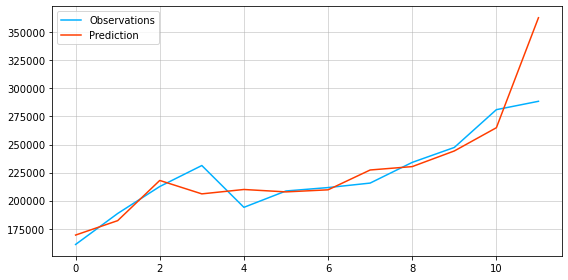

In [67]:
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
plt.figure(figsize=(8,4))
plt.plot(label,color='#00b0ff',label="Observations",linewidth=1.5)
plt.plot(y,color='#ff3d00',label="Prediction",linewidth=1.5)
plt.legend(loc="upper left")
plt.grid(alpha=0.6)
plt.tight_layout()

In [54]:
y_train_pred

array([264970.59233921, 362953.64831249])

In [55]:
label_predict

array([[281060],
       [288513]], dtype=int64)